# Exploración

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.formula.api import ols

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import ttest_1samp
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro

from dateutil import parser

In [2]:
datos_enfermedad = pd.read_csv("data/Datos Lab 1.csv")

In [3]:
data = datos_enfermedad.copy()

In [4]:
data.head(20)

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.000,114.300,1.720,38.600,100.000,112/83,228.0,...,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.000,92.923,1.842,33.116,106.315,101/91,158.0,...,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,...,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW
3,dCDO1109,"April 18, 2022",F,35.000,113.300,1.780,35.800,79.600,92/89,158.0,...,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,01/11/2024,F,48.000,102.200,1.750,33.400,106.700,121/68,207.0,...,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
5,MQyB2747,25 Mar 24,M,43.000,52.700,1.850,15.400,107.700,107/61,105.0,...,High,N,185.000,0.582,107.0,61.0,Normal,43.0,10.530,INTERMEDIARY
6,DHdn8968,22 May 25,F,31.000,87.000,1.660,31.600,91.500,139/81,207.0,...,Low,Y,166.000,0.551,139.0,81.0,Hypertension Stage 1,121.0,17.410,HIGH
7,vkQL9700,"October 26, 2023",M,69.000,59.684,1.940,23.914,117.986,106/115,206.0,...,High,Y,193.981,0.608,106.0,115.0,Hypertension Stage 2,134.0,16.203,HIGH
8,bUBT9994,15/12/2023,F,89.162,85.600,1.660,31.100,83.600,103/99,222.0,...,High,N,166.000,0.504,103.0,99.0,Hypertension Stage 2,126.0,NaN,HIGH
9,nktq6689,"January 16, 2022",F,57.000,100.130,1.840,22.242,80.814,165/99,123.0,...,Low,N,183.988,0.439,165.0,99.0,Hypertension Stage 2,39.0,15.158,LOW


In [5]:
display(data.sample(20))

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
111,CLPe9005,01-11-2025,M,52.0,101.493,1.834,30.829,119.436,101/63,261.0,...,Moderate,Y,183.426,0.651,101.0,63.0,Normal,147.0,18.436,HIGH
1374,TDFh4321,07-30-2021,F,69.0,108.428,1.579,30.689,75.798,122/112,159.0,...,Moderate,N,157.940,0.480,122.0,112.0,Hypertension Stage 2,40.0,17.418,HIGH
624,XZCU4466,22/01/2024,F,52.0,97.800,NaN,31.600,94.800,124/92,216.0,...,High,N,176.000,0.539,124.0,92.0,Hypertension Stage 2,136.0,18.840,HIGH
1026,ZeWA1217,26/10/2025,F,41.0,93.000,1.880,26.300,99.200,114/96,158.0,...,Moderate,Y,188.000,0.528,114.0,NaN,Hypertension Stage 2,70.0,14.120,INTERMEDIARY
633,KPkL3149,06-21-2021,F,57.0,58.500,1.820,17.700,83.900,97/80,NaN,...,Moderate,N,182.000,0.461,97.0,80.0,Hypertension Stage 1,206.0,14.210,INTERMEDIARY
629,Xpxi0931,03/12/2024,F,30.0,NaN,1.650,36.700,108.100,130/81,101.0,...,Moderate,N,165.000,0.655,130.0,81.0,Hypertension Stage 1,40.0,17.860,INTERMEDIARY
1130,XCaT6636,17 Dec 23,M,43.0,83.600,1.880,23.700,91.000,106/92,245.0,...,Low,Y,188.000,0.484,106.0,92.0,Hypertension Stage 2,177.0,16.940,HIGH
152,XZCU4466,22/01/2024,F,52.0,97.800,NaN,31.600,94.800,124/92,216.0,...,High,N,176.000,0.539,124.0,92.0,Hypertension Stage 2,136.0,18.840,HIGH
730,bIQZ5763,"May 26, 2020",M,33.0,99.500,1.750,32.500,73.200,100/80,149.0,...,Low,Y,175.000,0.418,100.0,80.0,Hypertension Stage 1,41.0,14.480,HIGH
336,OIoO2199,10 Oct 23,M,34.0,103.800,1.840,30.700,82.100,123/87,267.0,...,Moderate,N,184.000,0.446,123.0,87.0,Hypertension Stage 1,169.0,17.630,INTERMEDIARY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    1639 non-null   object 
 1   Date of Service               1639 non-null   object 
 2   Sex                           1639 non-null   object 
 3   Age                           1571 non-null   float64
 4   Weight (kg)                   1566 non-null   float64
 5   Height (m)                    1578 non-null   float64
 6   BMI                           1586 non-null   float64
 7   Abdominal Circumference (cm)  1578 non-null   float64
 8   Blood Pressure (mmHg)         1639 non-null   object 
 9   Total Cholesterol (mg/dL)     1571 non-null   float64
 10  HDL (mg/dL)                   1557 non-null   float64
 11  Fasting Blood Sugar (mg/dL)   1585 non-null   float64
 12  Smoking Status                1639 non-null   object 
 13  Dia

In [7]:
dict = pd.read_excel("data/DiccPacientes.xlsx")
pd.set_option('display.max_colwidth', None)
dict

,Nombre Columna,Tipo de dato,Comentarios
0,Patient ID,String,Identificador del paciente
1,Date of Service,Date,Fecha de la atención
2,Sex,String,"Sexo (Femenino, Masculino)"
3,Age,Integer,Edad
4,Weight (kg),Float,Peso
5,Height (m),Float,Altura
6,BMI,Float,Índice de masa corporal
7,Abdominal Circumference (cm),Float,Circunferencia abdominal
8,Blood Pressure (mmHg),String,"Presión sanguínea, de la forma ""<Presión arterial sistólica>/<Presión arterial diastólica>"""
9,Total Cholesterol (mg/dL),Float,Colesterol total


In [8]:
data.shape

(1639, 24)

In [9]:
data.describe()

,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
count,1571.000000,1566.000000,1578.000000,1586.000000,1578.000000,1571.000000,1557.000000,1585.000000,1571.000000,1563.000000,1578.000000,1554.000000,1582.000000,1610.000000
mean,46.803186,85.666006,1.757439,28.424744,91.538861,199.043673,56.183558,117.836860,175.770082,0.522440,125.632637,82.887536,113.235896,18.227281
std,13.039479,21.712504,0.118012,7.309275,13.427985,59.388670,16.721702,32.379634,11.695880,0.085692,22.577463,15.503625,61.435291,10.767666
min,6.134000,13.261000,1.371000,4.317000,49.542000,-1.256000,0.008000,15.306000,136.498000,0.250000,49.914000,31.720000,-92.055000,-20.057000
25%,37.000000,67.100000,1.666500,22.600000,79.700000,150.000000,42.000000,92.000000,167.000000,0.453000,108.000000,71.000000,62.000000,15.150000
50%,46.000000,86.314000,1.760000,28.000000,91.200000,199.000000,56.000000,115.000000,176.000000,0.519000,125.000000,82.000000,112.000000,16.967000
75%,55.000000,104.801500,1.850000,33.963000,102.267250,250.000000,70.000000,139.000000,185.000000,0.582000,141.000000,93.000000,159.000000,18.900000
max,89.420000,158.523000,2.146000,53.028000,136.336000,385.679000,110.315000,219.667000,214.394000,0.804000,202.711000,134.066000,317.314000,114.980000


In [10]:
data.isna().sum()

Patient ID                       0
Date of Service                  0
Sex                              0
Age                             68
Weight (kg)                     73
Height (m)                      61
BMI                             53
Abdominal Circumference (cm)    61
Blood Pressure (mmHg)            0
Total Cholesterol (mg/dL)       68
HDL (mg/dL)                     82
Fasting Blood Sugar (mg/dL)     54
Smoking Status                   0
Diabetes Status                  0
Physical Activity Level          0
Family History of CVD            0
Height (cm)                     68
Waist-to-Height Ratio           76
Systolic BP                     61
Diastolic BP                    85
Blood Pressure Category          0
Estimated LDL (mg/dL)           57
CVD Risk Score                  29
CVD Risk Level                   0
dtype: int64

In [11]:
((data.isnull().sum()/data.shape[0])).sort_values(ascending=False)

Diastolic BP                    0.051861
HDL (mg/dL)                     0.050031
Waist-to-Height Ratio           0.046370
Weight (kg)                     0.044539
Total Cholesterol (mg/dL)       0.041489
Age                             0.041489
Height (cm)                     0.041489
Height (m)                      0.037218
Abdominal Circumference (cm)    0.037218
Systolic BP                     0.037218
Estimated LDL (mg/dL)           0.034777
Fasting Blood Sugar (mg/dL)     0.032947
BMI                             0.032337
CVD Risk Score                  0.017694
Sex                             0.000000
Patient ID                      0.000000
Date of Service                 0.000000
Family History of CVD           0.000000
Diabetes Status                 0.000000
Smoking Status                  0.000000
Blood Pressure (mmHg)           0.000000
Physical Activity Level         0.000000
Blood Pressure Category         0.000000
CVD Risk Level                  0.000000
dtype: float64

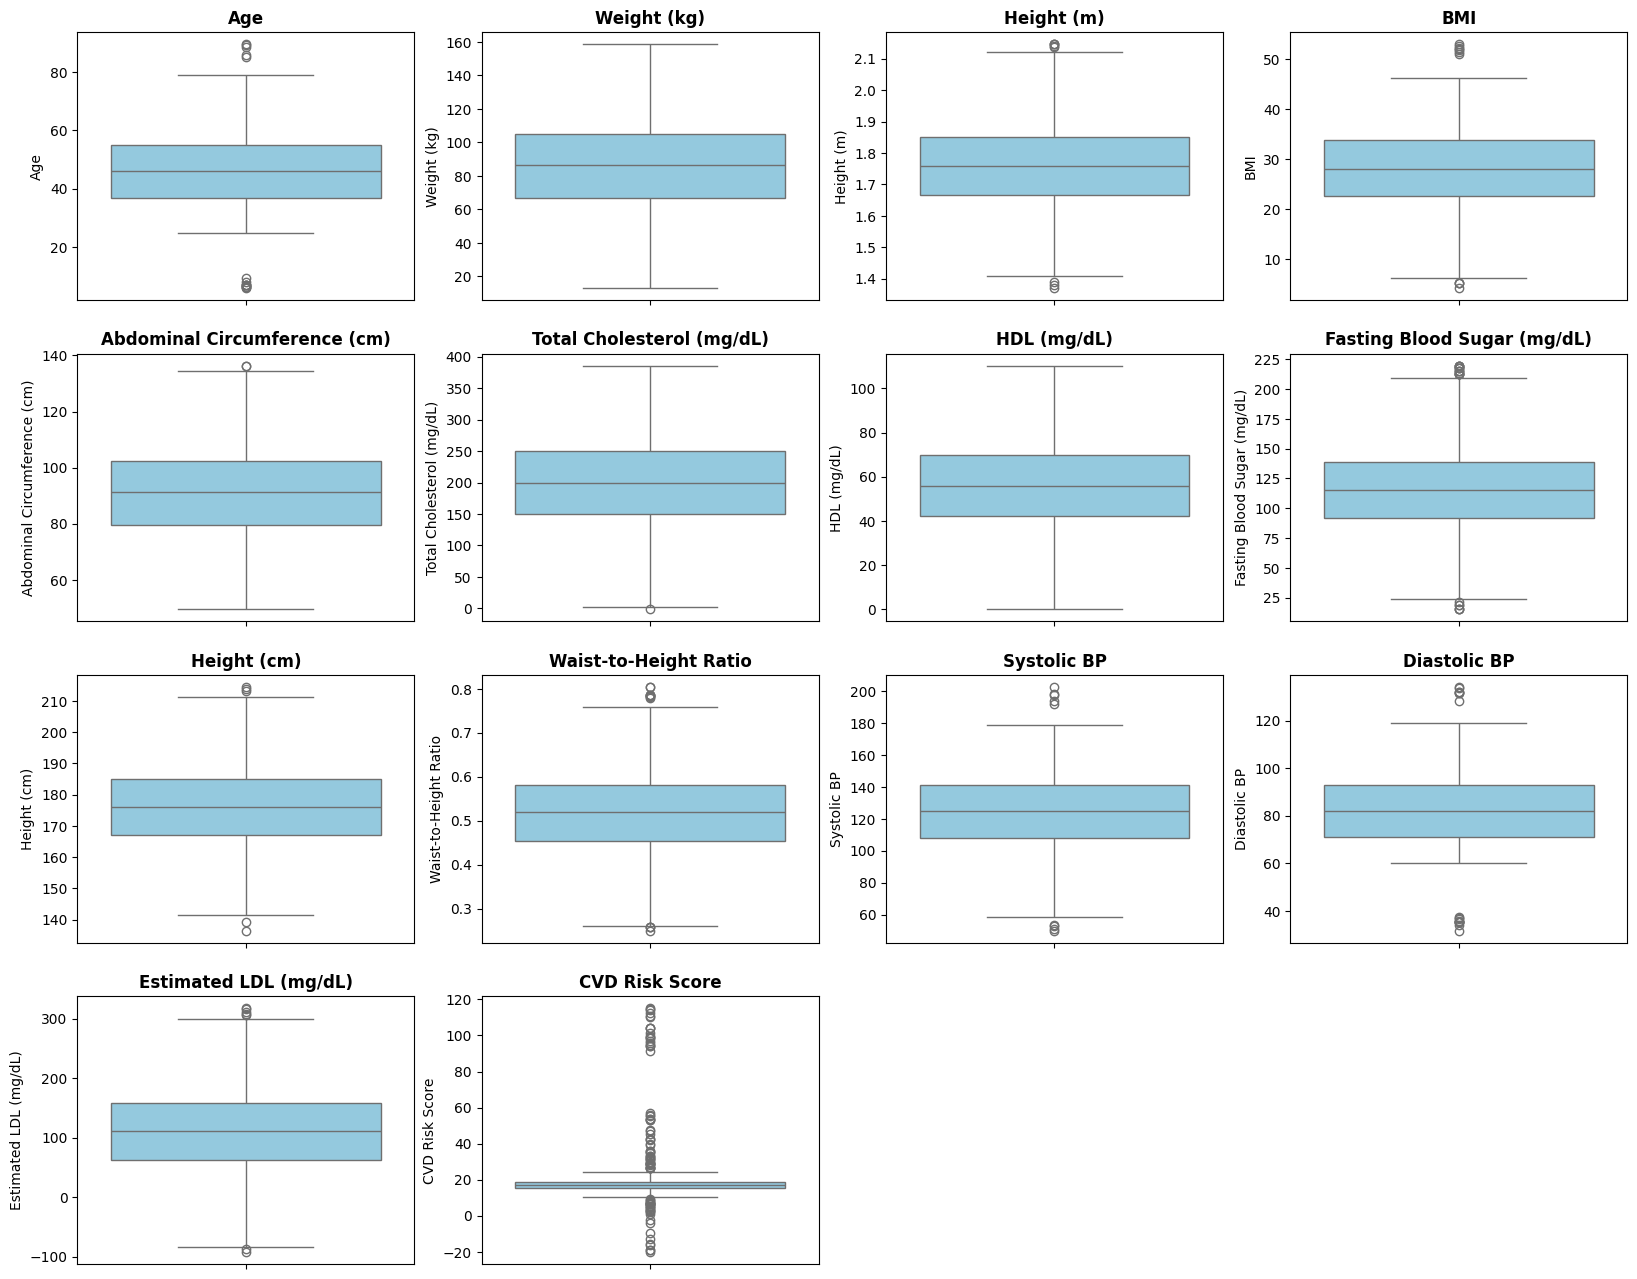

In [12]:
numeric_cols = data.select_dtypes(include=[np.number]).columns

n_cols = 4
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(y=data[col], ax=axes[idx], color='skyblue')
    axes[idx].set_title(col, fontweight='bold')

for idx in range(len(numeric_cols), len(axes)):
    axes[idx].axis('off')

plt.show()

In [13]:
filasAlturaNaN = data[data['Height (cm)'].isna() & data['Height (m)'].isna()]
print(f"Total de filas con ambas alturas faltantes: {len(filasAlturaNaN)}")

Total de filas con ambas alturas faltantes: 3


In [14]:
filasAlturaNaN

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
306,Qbvz4402,11 Jul 20,F,55.0,115.3,NaN,32.3,85.6,113/98,192.0,...,Low,Y,NaN,0.453,113.0,98.0,Hypertension Stage 2,107.0,17.95,HIGH
684,qoOw6598,16 Apr 23,F,60.0,116.2,NaN,36.7,97.8,112/80,188.0,...,Moderate,N,NaN,0.549,112.0,80.0,Hypertension Stage 1,106.0,16.70,INTERMEDIARY
839,Ehkg3243,03-04-2023,M,32.0,111.8,NaN,41.6,95.8,95/96,199.0,...,High,N,NaN,0.584,95.0,96.0,Hypertension Stage 2,128.0,17.05,INTERMEDIARY


In [15]:
filasW_HNaN = data[data['Height (cm)'].isna() & data['Abdominal Circumference (cm)'].isna() & data['Waist-to-Height Ratio'].isna()]
print(f"Total de filas con altura (cm) y cintura faltantes: {len(filasW_HNaN)}")

Total de filas con altura (cm) y cintura faltantes: 0


In [16]:
filasWHNaN = data[data['Height (cm)'].isna() & data['Abdominal Circumference (cm)'].isna()]
print(f"Total de filas con altura (cm) y cintura faltantes: {len(filasWHNaN)}")

Total de filas con altura (cm) y cintura faltantes: 5


In [17]:
filasHm_NaN = data[data['Height (m)'].isna() & data['Abdominal Circumference (cm)'].isna()]
print(f"Total de filas con altura (m) y cintura faltantes: {len(filasHm_NaN)}")

Total de filas con altura (m) y cintura faltantes: 4


In [18]:
filasHW_NaN = data[data['Height (cm)'].isna() & data['Abdominal Circumference (cm)'].isna() & data['Height (m)'].isna()]
print(f"Total de filas con altura (cm) y cintura faltantes: {len(filasHW_NaN)}")

Total de filas con altura (cm) y cintura faltantes: 0


In [19]:
data["CVD Risk Level"].value_counts()

CVD Risk Level
HIGH            793
INTERMEDIARY    616
LOW             230
Name: count, dtype: int64

In [20]:
data["Blood Pressure Category"].value_counts()

Blood Pressure Category
Hypertension Stage 2    680
Hypertension Stage 1    527
Normal                  321
Elevated                111
Name: count, dtype: int64

In [21]:
data["Sex"].value_counts()

Sex
M    821
F    818
Name: count, dtype: int64

In [22]:
data["Physical Activity Level"].value_counts()

Physical Activity Level
High        582
Moderate    537
Low         520
Name: count, dtype: int64

In [23]:
data['Smoking Status'].value_counts()

Smoking Status
Y    850
N    789
Name: count, dtype: int64

In [24]:
data['Family History of CVD'].value_counts()

Family History of CVD
N    820
Y    819
Name: count, dtype: int64

In [25]:
data["Patient ID"].duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
1634    False
1635    False
1636     True
1637    False
1638    False
Name: Patient ID, Length: 1639, dtype: bool

In [26]:
duplicados=data[data["Patient ID"].duplicated(keep=False)].sort_values("Patient ID")
duplicados

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
17,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.0,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH
1584,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.0,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH
1227,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.0,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,-13.090,HIGH
1117,Axab9332,2021-12-11,F,58.0,69.870,1.944,20.785,86.259,162/106,151.0,...,Moderate,N,194.450,0.444,162.0,106.0,Hypertension Stage 2,44.0,23.430,HIGH
383,Axab9332,2021-12-11,F,58.0,69.870,1.944,20.785,86.259,162/106,151.0,...,Moderate,N,194.450,0.444,162.0,106.0,Hypertension Stage 2,44.0,15.277,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,zhZi8857,"December 05, 2025",F,36.0,81.200,1.750,26.500,74.000,141/76,225.0,...,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.0,16.850,HIGH
727,zhZi8857,"December 05, 2025",F,36.0,81.200,1.750,26.500,74.000,141/76,225.0,...,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.0,41.813,HIGH
1548,zhZi8857,"December 05, 2025",F,36.0,81.200,1.750,26.500,74.000,141/76,225.0,...,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.0,16.850,HIGH
1565,zxhX5525,"November 13, 2021",M,26.0,58.953,1.688,25.286,NaN,110/114,258.0,...,High,Y,168.763,0.455,110.0,114.0,Hypertension Stage 2,170.0,15.717,HIGH


In [27]:
duplicados.iloc[5:80]

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
1469,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.100,116/93,171.0,...,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,29.833,LOW
130,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.100,116/93,171.0,...,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,17.500,LOW
1544,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.100,116/93,171.0,...,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,17.500,LOW
846,BqZp2317,"April 15, 2025",F,72.0,57.836,1.554,24.008,115.565,157/75,211.0,...,Moderate,N,155.404,0.744,157.0,75.0,Hypertension Stage 2,100.0,16.872,INTERMEDIARY
305,BqZp2317,"April 15, 2025",F,72.0,57.836,1.554,24.008,115.565,157/75,211.0,...,Moderate,N,155.404,0.744,157.0,75.0,Hypertension Stage 2,100.0,7.050,INTERMEDIARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,JsvV0478,"November 14, 2025",F,50.0,72.800,1.790,22.700,76.800,119/81,276.0,...,Moderate,Y,179.000,0.429,119.0,81.0,Hypertension Stage 1,210.0,16.010,HIGH
276,JsvV0478,"November 14, 2025",F,50.0,72.800,1.790,22.700,76.800,119/81,276.0,...,Moderate,Y,179.000,0.429,119.0,81.0,Hypertension Stage 1,210.0,16.010,HIGH
1351,KGuE6384,11-20-2021,F,33.0,105.351,1.680,28.038,109.807,146/91,288.0,...,High,Y,167.977,0.654,146.0,91.0,Hypertension Stage 2,210.0,19.138,LOW
491,KGuE6384,11-20-2021,F,33.0,105.351,1.680,28.038,109.807,146/91,288.0,...,High,Y,167.977,0.654,146.0,91.0,Hypertension Stage 2,210.0,20.668,LOW


In [28]:
dup_counts= (data["Patient ID"].value_counts()
                            .loc[lambda x: x > 1]
                            .sort_values(ascending=False))
for id_,n in dup_counts.items():
    print(f"Patient ID: {id_} → {n} apariciones")

Patient ID: eAaf2477 → 3 apariciones
Patient ID: ZDBx7052 → 3 apariciones
Patient ID: wMaN5754 → 3 apariciones
Patient ID: HNwp6592 → 3 apariciones
Patient ID: NIUR3991 → 3 apariciones
Patient ID: mMoS9467 → 3 apariciones
Patient ID: DIVT3121 → 3 apariciones
Patient ID: rfYk3516 → 3 apariciones
Patient ID: nmgP2712 → 3 apariciones
Patient ID: VgtQ3260 → 3 apariciones
Patient ID: GhAN9460 → 3 apariciones
Patient ID: XZCU4466 → 3 apariciones
Patient ID: kajW6905 → 3 apariciones
Patient ID: LpyK7269 → 3 apariciones
Patient ID: PHii0023 → 3 apariciones
Patient ID: gynJ3543 → 3 apariciones
Patient ID: mrZW4662 → 3 apariciones
Patient ID: inTX4760 → 3 apariciones
Patient ID: bCoz6266 → 3 apariciones
Patient ID: Kbzi4901 → 3 apariciones
Patient ID: VdGt7927 → 3 apariciones
Patient ID: IwMD4008 → 3 apariciones
Patient ID: dNyM1057 → 3 apariciones
Patient ID: ZEEd3660 → 3 apariciones
Patient ID: ZEFR1505 → 3 apariciones
Patient ID: ePpS4710 → 3 apariciones
Patient ID: Uinq3357 → 3 apariciones
P

# Limpieza Inicial De Datos Modelo 1

In [29]:
dataModelo1=data.copy()

In [30]:
def convertir_fecha(fecha):
    if pd.isna(fecha):
        return pd.NaT
    try:
        return pd.to_datetime(fecha)
    except:
        try:
            return pd.Timestamp(parser.parse(str(fecha)))
        except:
            return pd.NaT

# ESTA ES LA LÍNEA CLAVE - Aplicar conversión
dataModelo1['Date of Service'] = dataModelo1['Date of Service'].apply(convertir_fecha)
dataModelo1

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_18864\1808658146.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(fecha)


,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,2023-11-08,M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,...,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,2024-03-20,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,...,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,...,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW
3,dCDO1109,2022-04-18,F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,...,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,2024-01-11,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,...,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,mrzf5858,2021-05-21,F,35.0,77.600,1.780,24.500,84.600,124/90,143.0,...,Low,N,178.000,0.475,124.0,90.0,Hypertension Stage 2,37.0,13.960,LOW
1635,nPnN5477,2022-12-04,F,35.0,92.005,1.726,NaN,98.692,95/111,156.0,...,High,N,172.602,0.572,95.0,111.0,Hypertension Stage 2,46.0,14.316,LOW
1636,ePpS4710,2022-12-04,M,48.0,50.100,1.770,16.000,104.100,146/95,210.0,...,Low,Y,177.000,0.588,146.0,NaN,Hypertension Stage 2,110.0,NaN,HIGH
1637,QSFT6794,2025-09-06,M,49.0,NaN,1.630,23.100,93.800,144/91,191.0,...,Moderate,Y,163.000,0.575,144.0,NaN,Hypertension Stage 2,82.0,17.640,HIGH


In [31]:
dataModelo1['Date of Service'].isna().sum()

np.int64(0)

In [32]:
dataModelo1[dataModelo1.duplicated(keep=False)].sort_values("Patient ID")

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
17,AhYt1346,2020-09-28,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH
1584,AhYt1346,2020-09-28,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH
130,BQvQ6431,2020-09-11,M,33.0,118.300,1.690,41.400,72.1,116/93,171.0,...,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,17.500,LOW
1544,BQvQ6431,2020-09-11,M,33.0,118.300,1.690,41.400,72.1,116/93,171.0,...,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,17.500,LOW
1241,CDsa2651,2025-06-23,M,39.0,73.300,1.740,24.200,95.0,111/84,158.0,...,High,Y,174.000,0.546,111.0,84.0,Hypertension Stage 1,91.0,15.550,INTERMEDIARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,zcgB3048,2020-12-06,M,38.0,60.436,1.506,20.269,79.7,168/63,119.0,...,High,N,150.616,0.529,168.0,63.0,Hypertension Stage 2,43.0,14.834,HIGH
956,zhZi8857,2025-12-05,F,36.0,81.200,1.750,26.500,74.0,141/76,225.0,...,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.0,16.850,HIGH
1548,zhZi8857,2025-12-05,F,36.0,81.200,1.750,26.500,74.0,141/76,225.0,...,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.0,16.850,HIGH
799,zxhX5525,2021-11-13,M,26.0,58.953,1.688,25.286,NaN,110/114,258.0,...,High,Y,168.763,0.455,110.0,114.0,Hypertension Stage 2,170.0,15.717,HIGH


Revisión de el número de duplicados exactos en DataFrame para eliminar.

In [33]:
dataModelo1=dataModelo1.drop_duplicates(keep="last")
dataModelo1[dataModelo1.duplicated(keep=False)]

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level


Eliminación de duplicados excatos y revisión de que esto si de realizara correctamente.

In [34]:
duplicadosModelo1=dataModelo1[dataModelo1["Patient ID"].duplicated(keep=False)].sort_values("Patient ID")
duplicadosModelo1

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
1584,AhYt1346,2020-09-28,M,41.0,71.300,1.730,23.800,107.900,139/61,253.0,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH
1227,AhYt1346,2020-09-28,M,41.0,71.300,1.730,23.800,107.900,139/61,253.0,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,-13.090,HIGH
1117,Axab9332,2021-12-11,F,58.0,69.870,1.944,20.785,86.259,162/106,151.0,...,Moderate,N,194.450,0.444,162.0,106.0,Hypertension Stage 2,44.0,23.430,HIGH
383,Axab9332,2021-12-11,F,58.0,69.870,1.944,20.785,86.259,162/106,151.0,...,Moderate,N,194.450,0.444,162.0,106.0,Hypertension Stage 2,44.0,15.277,HIGH
1544,BQvQ6431,2020-09-11,M,33.0,118.300,1.690,41.400,72.100,116/93,171.0,...,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,17.500,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,yAsk5000,2023-01-09,F,59.0,89.400,1.670,32.100,107.200,118/89,206.0,...,Low,Y,167.000,0.642,118.0,89.0,Hypertension Stage 1,122.0,12.137,HIGH
1452,zZle5455,2022-04-13,M,53.0,108.159,1.925,24.081,NaN,162/94,141.0,...,Moderate,N,NaN,0.411,162.0,94.0,Hypertension Stage 2,63.0,19.523,HIGH
1367,zZle5455,2022-04-13,M,53.0,108.159,1.925,24.081,NaN,162/94,141.0,...,Moderate,N,NaN,0.411,162.0,94.0,Hypertension Stage 2,63.0,17.736,HIGH
727,zhZi8857,2025-12-05,F,36.0,81.200,1.750,26.500,74.000,141/76,225.0,...,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.0,41.813,HIGH


Revison de Datos de IDs de pacientes duplicados, para revisar las fechas de toma de los datos y si entre estos hay inconsistencias en el CVD Risk Score y en el CVD Risk Level

In [36]:
indices_eliminar = []
for (pid, fecha), grupo in dataModelo1.groupby(['Patient ID', 'Date of Service']):
    if len(grupo) > 1:
        scores = grupo['CVD Risk Score'].dropna().unique()
        levels = grupo['CVD Risk Level'].dropna().unique()
        if len(scores) > 1 or len(levels) > 1:
            indices_eliminar.extend(grupo.index.tolist())

dataModelo1 = dataModelo1.drop(indices_eliminar)

dataModelo1 = dataModelo1.sort_values('Date of Service', ascending=False)
dataModelo1 = dataModelo1.drop_duplicates(subset='Patient ID', keep='first')


Se eliminaron los datos que a pesar de haber sido tomados en la misma fecha tenien valores de 'CVD Risk Score' o 'CVD Risk Level' diferentes. En caso de que no existiera esta diferencia se eliminaron los duplicados menod recientes, dejando solo un dato por paciente.

In [39]:
dataModelo1.shape

(1265, 24)

In [40]:
dataModelo1['CVD Risk Score'].isna().sum()

np.int64(28)

Revisar El número de datos que tienen el CVD Risk Score vacio (NaN) para eliminar esos datos

In [45]:
dataModelo1=dataModelo1.dropna(subset=['CVD Risk Score'])

Eliminación de datos que teinen CVD Risk Score vacio.

In [46]:
dataModelo1.shape

(1237, 24)

Revisión del tamaño de la matriz luego de esta transformacióny revisión de que se eliminaron el número de datos correcto.

In [47]:
Q1 = dataModelo1['CVD Risk Score'].quantile(0.25)
Q3 = dataModelo1['CVD Risk Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

calculo de el rango aceptado para los valores del CVD Risk Score mediante el Rango Interquartile

In [48]:
outliers = dataModelo1[(dataModelo1["CVD Risk Score"] < lower_bound) | (dataModelo1["CVD Risk Score"] > upper_bound)]
len(outliers)

28

Revisón de número de outliers que hay en la variable CVD Risk Score para eliminarlos de la tabla

In [ ]:
dataModelo1 = dataModelo1[(dataModelo1["CVD Risk Score"] >= lower_bound) & (dataModelo1["CVD Risk Score"] <= upper_bound)]

Eliminación de las filas con Outliers en la variable CVD Risk Score

In [51]:
dataModelo1.shape

(1209, 24)

Revisión del tamaño de la matriz luego de esta transformacióny revisión de que se eliminaron el número de datos correcto.

# Partición de los datos Modelo 1